In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
from ram.analysis.run_manager import RunManager
from ram.analysis.model_selection.combo_search import CombinationSearch
from ram.analysis.statistics import get_stats, rollup_returns

In [3]:
RunManager.get_run_names('StatArbStrategy')

,RunName,RunDate,Completed,Description
0,run_0068,2018-03-06,True,"Sector 20, version 002"
1,run_0069,2018-03-07,True,"Sector 20, version 2 rerun with univ filtering"


#### Document last run date

In [4]:
print('TIMESTAMP for last run of this script:')
print(dt.datetime.utcnow())

TIMESTAMP for last run of this script:
2018-03-09 20:41:27.671705


#### Current runs for implementation

In [4]:
runs = [
    'run_0069'
]

#### Check that all run files are up-to-date

In [9]:
for r in runs:
    run = RunManager('StatArbStrategy', r, test_periods=0)
    run.import_return_frame()
    print('{} - {}'.format(r, run.returns.index[-1]))

run_0069 - 2018-01-31 00:00:00


#### Import

In [5]:
#drop_params = [('drop_ibes', True)]
drop_params = []

comb = CombinationSearch(write_flag=True)
comb.params['training_epochs'] = 20

for r in runs:
    comb.add_run(RunManager('StatArbStrategy', r, 
                            test_periods=0, start_year=2009, drop_params=drop_params))

In [6]:
comb.start()

Reading and aggregating runs...
Finished aggregating runs...


  0%|          | 0/20 [00:00<?, ?it/s]


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Writing run as: CombinationSearch_20180309205422
Max date: 2018-01-31
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



100%|██████████| 20/20 [03:33<00:00, 10.49s/it]


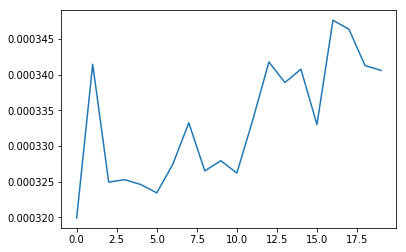

In [13]:
plt.figure()
plt.plot(comb.epoch_stats.Mean)
plt.show()

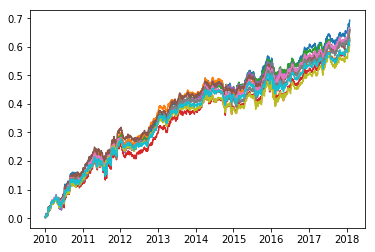

In [15]:
plt.figure()
plt.plot(comb.best_results_returns.cumsum())
plt.show()